In [20]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data = pd.read_csv(mouse_drug_data_to_load)
clin_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the dat into a single dataset
combined_mouses_df = pd.merge(mouse_data, clin_data, how='outer', on='Mouse ID')


# Display the data table for preview
combined_mouses_df

####This is the table shown on the GitLab. I would think the combined table would be the requested one?
clin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


## Tumor Response to Treatment

In [41]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_group = combined_mouses_df.groupby(['Drug', "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
drug_group = pd.DataFrame(drug_group)

# Preview DataFrame
drug_group.columns = ['Metastatic Sites']
drug_group

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                 45.000000
          5                 44.266086
          10                43.084291
          15                42.064317
          20                40.716325
...                               ...
Zoniferol 25                55.432935
          30                57.713531
          35                60.089372
          40                62.916692
          45                65.960888

[100 rows x 1 columns]

In [42]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = combined_mouses_df.groupby(['Drug', "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_volume_sem_df = pd.DataFrame(tumor_volume_sem)

# Preview DataFrame
tumor_volume_sem_df.columns = ['Metastatic Sites']
tumor_volume_sem_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.448593
          10                 0.702684
          15                 0.838617
          20                 0.909731
...                               ...
Zoniferol 25                 0.602513
          30                 0.800043
          35                 0.881426
          40                 0.998515
          45                 1.003576

[100 rows x 1 columns]

In [36]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vols_mean = drug_group.reset_index()
tumor_vols_mean_pivot = tumor_vols_mean.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
tumor_vols_mean_pivot

tumor_vols_sem = tumor_volume_sem_df.reset_index()
tumor_vols_sem_pivot = tumor_vols_sem.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
tumor_vols_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


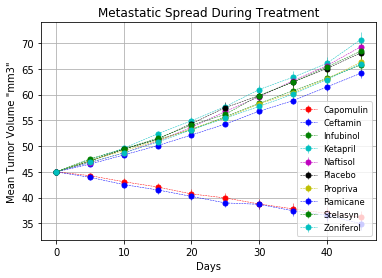

In [24]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vols_mean_pivot.index, tumor_vols_mean_pivot["Capomulin"], yerr=tumor_vols_sem_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.errorbar(tumor_vols_mean_pivot.index, tumor_vols_mean_pivot["Ceftamin"], yerr=tumor_vols_sem_pivot["Ceftamin"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Ceftamin")
plt.errorbar(tumor_vols_mean_pivot.index, tumor_vols_mean_pivot["Infubinol"], yerr=tumor_vols_sem_pivot["Infubinol"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(tumor_vols_mean_pivot.index, tumor_vols_mean_pivot["Ketapril"], yerr=tumor_vols_sem_pivot["Ketapril"], color="c", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(tumor_vols_mean_pivot.index, tumor_vols_mean_pivot["Naftisol"], yerr=tumor_vols_sem_pivot["Naftisol"], color="m", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Naftisol")
plt.errorbar(tumor_vols_mean_pivot.index, tumor_vols_mean_pivot["Placebo"], yerr=tumor_vols_sem_pivot["Placebo"], color="k", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")
plt.errorbar(tumor_vols_mean_pivot.index, tumor_vols_mean_pivot["Propriva"], yerr=tumor_vols_sem_pivot["Propriva"], color="y", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Propriva")
plt.errorbar(tumor_vols_mean_pivot.index, tumor_vols_mean_pivot["Ramicane"], yerr=tumor_vols_sem_pivot["Ramicane"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Ramicane")
plt.errorbar(tumor_vols_mean_pivot.index, tumor_vols_mean_pivot["Stelasyn"], yerr=tumor_vols_sem_pivot["Stelasyn"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Stelasyn")
plt.errorbar(tumor_vols_mean_pivot.index, tumor_vols_mean_pivot["Zoniferol"], yerr=tumor_vols_sem_pivot["Zoniferol"], color="c", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Zoniferol")

plt.title("Metastatic Spread During Treatment")
plt.ylabel('Mean Tumor Volume "mm3"')
plt.xlabel("Days")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.show()


In [25]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [26]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

meta_group = combined_mouses_df.groupby(['Drug', "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
meta_group_df = pd.DataFrame(meta_group)
# Preview DataFrame
meta_group_df


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [27]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = combined_mouses_df.groupby(['Drug', "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
meta_sem_df = pd.DataFrame(meta_sem)
# Preview DataFrame
meta_sem_df


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [35]:
# Minor Data Munging to Re-Format the Data Frames
mean_df = meta_group_df.reset_index()
mean_pivot_df = mean_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

meta_df = meta_sem_df.reset_index()
meta_pivot_df = meta_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']


# Preview that Reformatting worked
mean_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


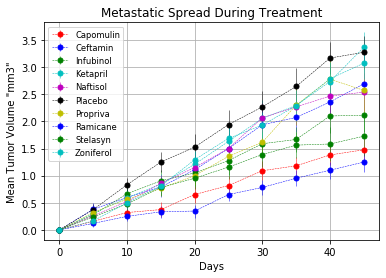

In [66]:
# Generate the Plot (with Error Bars)

plt.errorbar(mean_pivot_df.index, mean_pivot_df["Capomulin"], yerr=meta_pivot_df["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Ceftamin"], yerr=meta_pivot_df["Ceftamin"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Ceftamin")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Infubinol"], yerr=meta_pivot_df["Infubinol"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Ketapril"], yerr=meta_pivot_df["Ketapril"], color="c", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Naftisol"], yerr=meta_pivot_df["Naftisol"], color="m", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Naftisol")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Placebo"], yerr=meta_pivot_df["Placebo"], color="k", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Propriva"], yerr=meta_pivot_df["Propriva"], color="y", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Propriva")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Ramicane"], yerr=meta_pivot_df["Ramicane"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Ramicane")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Stelasyn"], yerr=meta_pivot_df["Stelasyn"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Stelasyn")
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Zoniferol"],yerr=meta_pivot_df["Zoniferol"], color="c", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Zoniferol")

plt.title("Metastatic Spread During Treatment")
plt.ylabel('Mean Tumor Volume "mm3"')
plt.xlabel("Days")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [57]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouses_count = combined_mouses_df.groupby(['Drug','Timepoint']).count()

# Convert to DataFrame
surv = mouses_count['Mouse ID'].reset_index()
# Preview DataFrame
surv

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [62]:
# Minor Data Munging to Re-Format the Data Frames
surv_piv = surv.pivot(index='Timepoint', columns='Drug')['Mouse ID']
# Preview the Data Frame
surv_piv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


TypeError: yticks() takes from 0 to 2 positional arguments but 6 were given

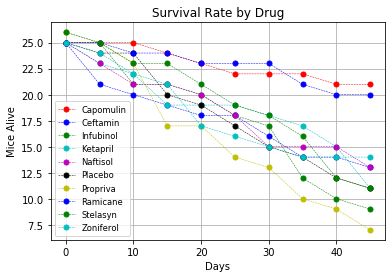

In [70]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(surv_piv.index, surv_piv["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.errorbar(surv_piv.index, surv_piv["Ceftamin"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Ceftamin")
plt.errorbar(surv_piv.index, surv_piv["Infubinol"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(surv_piv.index, surv_piv["Ketapril"], color="c", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(surv_piv.index, surv_piv["Naftisol"], color="m", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Naftisol")
plt.errorbar(surv_piv.index, surv_piv["Placebo"], color="k", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")
plt.errorbar(surv_piv.index, surv_piv["Propriva"], color="y", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Propriva")
plt.errorbar(surv_piv.index, surv_piv["Ramicane"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Ramicane")
plt.errorbar(surv_piv.index, surv_piv["Stelasyn"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Stelasyn")
plt.errorbar(surv_piv.index, surv_piv["Zoniferol"], color="c", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Zoniferol")

plt.title("Survival Rate by Drug")
plt.ylabel('Mice Alive')
plt.xlabel("Days")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.yticks(6,10,14,18,22,26)
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [33]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [34]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)